# Installing the libraries

In [1]:
!pip install opencv-python
!pip install tensorflow
!pip install keras

^C


# Importing required Libraries

In [2]:
import numpy as np 
import pandas as pd
from PIL import Image
import os
os.chdir(r'C:\Users\Devi Prasad Doddala\Desktop\Capstone P-2\Execution\Source')

# Preprocessing the images

In [3]:
data = []     
labels = []
classes = 10 #since we have 10 classes of signs
current_path = os.getcwd() #gets cwd

#current_path #to show the cwd


for i in range(classes):
    path = os.path.join(current_path,'Train',str(i))
    images = os.listdir(path)
    for j in images:
        try:
            image = Image.open(path + '\\' + j)
            image = image.resize((128,128))
            image = np.array(image)
            data.append(image)
            labels.append(i)
        except Exception as e:
            print(e)

# Converting Lists to Numpy Arrays

In [4]:
data = np.array(data)
labels = np.array(labels)

#saving them for future use

data = np.save(r'C:\Users\Devi Prasad Doddala\Desktop\Capstone P-2\Execution\Source\Training\data',data)
labels = np.save(r'C:\Users\Devi Prasad Doddala\Desktop\Capstone P-2\Execution\Source\Training\target',labels)

# Loading data and Labels

In [5]:
data = np.load(r'C:\Users\Devi Prasad Doddala\Desktop\Capstone P-2\Execution\Source\Training\data.npy')
labels = np.load(r'C:\Users\Devi Prasad Doddala\Desktop\Capstone P-2\Execution\Source\Training\target.npy')

#printing their shape

print(data.shape, labels.shape)

(19954, 128, 128, 3) (19954,)


# Splitting for train and test

In [6]:
from sklearn.model_selection import train_test_split
from keras.utils import to_categorical

In [7]:
x_train, x_test,y_train, y_test = train_test_split(data, labels, test_size = 0.2, random_state = 0)

# Printing the shape of train and test

In [8]:
print(x_train.shape, x_test.shape, y_train.shape, y_test.shape)

#the test size is 3992 yeilding a 75:25 ratio, of Train:Test.

(15963, 128, 128, 3) (3991, 128, 128, 3) (15963,) (3991,)


# Converting labels to onehot encoding

In [9]:
#https://medium.com/acing-ai/why-do-we-need-one-hot-encoding-7bcb456d49df
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)

# Model

In [10]:
import tensorflow as tf
from keras.models import Sequential
from keras.layers import Conv2D, MaxPool2D, Dense, Flatten, Dropout

In [11]:

#https://machinelearningmastery.com/keras-functional-api-deep-learning/

model = Sequential()

model.add(Conv2D(filters=32, kernel_size=(5,5), activation='relu', input_shape=x_train.shape[1:]))
model.add(Conv2D(filters=32, kernel_size=(5,5), activation='relu'))
model.add(MaxPool2D(pool_size=(2, 2)))

model.add(Dropout(rate=0.25))

model.add(Conv2D(filters=64, kernel_size=(3, 3), activation='relu'))
model.add(Conv2D(filters=64, kernel_size=(3, 3), activation='relu'))
model.add(MaxPool2D(pool_size=(2, 2)))

model.add(Dropout(rate=0.25))

model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dropout(rate=0.5))

model.add(Dense(10, activation='softmax')) 

#convlayer 1
#convlayer 2
#dense 1
#flatten 1
#dense 2
reference - https://medium.com/featurepreneur/vanilla-nn-vs-cnn-d965f41758de

# Configuration of model

In [12]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# Training the model

In [ ]:
epochs = 15
history = model.fit(x_train, y_train, batch_size = 32, epochs = epochs, validation_data = (x_test, y_test))

Epoch 1/15
499/499 [==============================] - 532s 1s/step - loss: 2.5556 - accuracy: 0.4222 - val_loss: 0.6593 - val_accuracy: 0.7970
Epoch 2/15
499/499 [==============================] - 440s 882ms/step - loss: 0.7090 - accuracy: 0.7658 - val_loss: 0.4976 - val_accuracy: 0.8389
Epoch 3/15
426/499 [========================>.....] - ETA: 1:03 - loss: 0.4626 - accuracy: 0.8474

## Accuracy

In [ ]:
import matplotlib.pyplot as plt

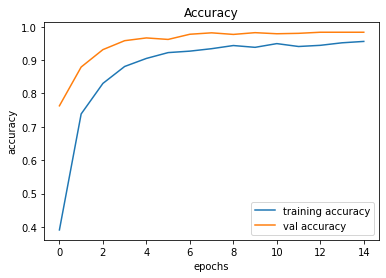

In [40]:


# accuracy 
plt.figure(0)
plt.plot(history.history['accuracy'], label='training accuracy')
plt.plot(history.history['val_accuracy'], label='val accuracy')
plt.title('Accuracy')
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.legend()
plt.show()


## Loss

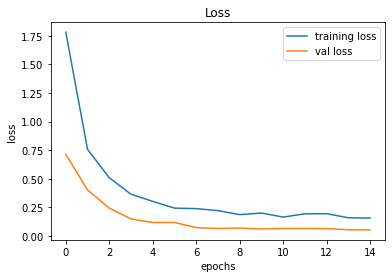

In [41]:
# Loss

plt.plot(history.history['loss'], label='training loss')
plt.plot(history.history['val_loss'], label='val loss')
plt.title('Loss')
plt.xlabel('epochs')
plt.ylabel('loss')
plt.legend()
plt.show()

## Saving the model

In [ ]:
model.save("./Model/model_TSR.h5")

## Load the model

In [5]:
import os
os.chdir(r'C:\Users\Devi Prasad Doddala\Desktop\Capstone P-2\Execution\Source')
from keras.models import load_model

In [6]:
model = load_model('./Model/model_TSR.h5')


In [7]:
# Classes of trafic signs
classes = { 0:'Speed limit (30km/h)',
            1:'Speed limit (50km/h)', 
            2:'Speed limit (60km/h)', 
            3:'Speed limit (70km/h)', 
            4:'Speed limit (80km/h)', 
            5:'Stop', 
            6:'No Entry', 
            7:'Turn Left', 
            8:'Turn Right', 
            9:'Bumpy Road'}

In [8]:
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt
from keras.models import load_model

In [9]:

def test_on_img(img):
    data=[]
    image = Image.open(img)
    image = image.resize((30,30))
    data.append(np.array(image))
    
    X_test=np.array(data)
    predict_x=model.predict(X_test) 
    classes_x=np.argmax(predict_x,axis=1)
   
    
    #X_test=np.array(data)
    #Y_pred = model.predict_classes(X_test)
    return image,classes_x

1/1 [==============================] - 0s 17ms/step
Predicted traffic sign is:  Speed limit (30km/h)


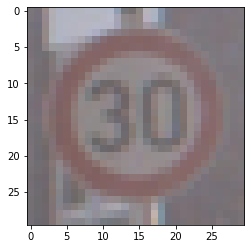

In [55]:
plot,prediction = test_on_img(r'C:\Users\Devi Prasad Doddala\Desktop\Capstone P-2\Execution\Source\Test\00001_00000_00006.png')
s = [str(i) for i in prediction] 
a = int("".join(s)) 
print("Predicted traffic sign is: ", classes[a])
plt.imshow(plot)
plt.show()

1/1 [==============================] - 0s 17ms/step
Predicted traffic sign is:  Speed limit (70km/h)


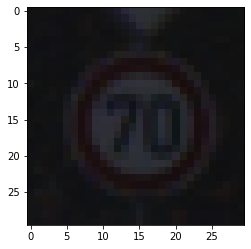

In [58]:
plot,prediction = test_on_img(r'C:\Users\Devi Prasad Doddala\Desktop\Capstone P-2\Execution\Source\Train\400005_00002_00002.png')
s = [str(i) for i in prediction] 
a = int("".join(s)) 
print("Predicted traffic sign is: ", classes[a])
plt.imshow(plot)
plt.show()

1/1 [==============================] - 0s 17ms/step
Predicted traffic sign is:  Bumpy Road


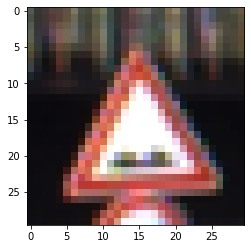

In [60]:

plot,prediction = test_on_img(r'C:\Users\Devi Prasad Doddala\Desktop\Capstone P-2\Execution\Source\Test\00022_00003_00006.png')
s = [str(i) for i in prediction] 
a = int("".join(s)) 
print("Predicted traffic sign is: ", classes[a])
plt.imshow(plot)
plt.show()

1/1 [==============================] - 0s 299ms/step
Predicted traffic sign is:  Speed limit (80km/h)


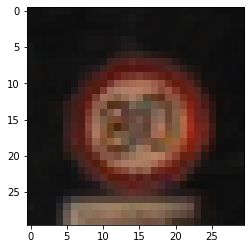

In [10]:
plot,prediction = test_on_img(r'C:\Users\Devi Prasad Doddala\Desktop\Capstone P-2\Execution\Source\Test\00005_00001_00011.png')
s = [str(i) for i in prediction] 
a = int("".join(s)) 
print("Predicted traffic sign is: ", classes[a])
plt.imshow(plot)
plt.show()

## trial

In [2]:
import os
os.chdir(r'C:\Users\Devi Prasad Doddala\Desktop\Capstone P-2\Execution\Source')
from keras.models import load_model
model = load_model('./Model/model_TSR.h5')
import pickle
pickle_out= open("model_trained.p","wb")  # wb = WRITE BYTE
pickle.dump(model,pickle_out)
pickle_out.close()

INFO:tensorflow:Assets written to: ram://7d1afbee-b141-4908-816c-cba712bd2853/assets


INFO:tensorflow:Assets written to: ram://7d1afbee-b141-4908-816c-cba712bd2853/assets
